In [1]:
%matplotlib inline
from pprint import pprint
from collections import defaultdict

import numpy as np
import math
import matplotlib.pyplot as plt
import warnings

from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import SGDClassifier

from sklearn.grid_search import GridSearchCV
from sklearn import metrics

from sklearn.learning_curve import learning_curve
from sklearn.learning_curve import validation_curve

import sys
sys.path.append('../dev')
from ml_plot import plot_validation_curve
from ml_plot import PredictCV, my_plot_learning_curve
from ml_plot import plot_prediction_curve
from ml_plot import get_dataset, eval_predictions

# Configuration

In [2]:
# PROJECT = 'nova'
# PROJECT = 'swift'
# PROJECT = 'cinder'
PROJECT = 'heat'
# PROJECT = 'glance'

# IMPORTANCE = 'crit'
# IMPORTANCE = 'high+'
IMPORTANCE = 'med+'
# IMPORTANCE = 'low+'

# SIZE = 100
#SIZE = 250
# SIZE = 0.1
SIZE = 0.5

SCORING = 'f1'         # (precision * recall) / (precision + recall)
# SCORING = 'accuracy'   # (TP + TN) / all values
# SCORING = 'precision'  # TP / (TP + FP)
# SCORING = 'recall'     # TP / (TP + FN)
# SCORING = 'average_precision'
# SCORING = 'roc_auc'

JOBS = 1

VERBOSE = 0

warnings.filterwarnings("ignore", 'F-score is ill-defined')

# Load Data

In [3]:
%%capture
Y, X = get_dataset(PROJECT, IMPORTANCE)

### Select Split Strategy

In [4]:
cv = PredictCV(len(Y), history=1000, future=500, n_iter=10)

# Initial Parameter Settings

In [5]:
estimator = SVC()

In [6]:
C_range = np.logspace(-2, 8, 11)
gamma_range = np.logspace(-5, 3, 9)
param_grid = dict(gamma=gamma_range, C=C_range, class_weight=['auto'])

In [7]:
grid = GridSearchCV(estimator, param_grid=param_grid, cv=cv, scoring=SCORING,
                    n_jobs=JOBS, pre_dispatch=2*JOBS, verbose=VERBOSE)
grid.fit(X, Y)
clf = grid.best_estimator_
print 'best_score: ', grid.best_score_
grid.best_estimator_

best_score:  0.417445193266


SVC(C=1.0, cache_size=200, class_weight='auto', coef0=0.0, degree=3,
  gamma=0.01, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [8]:
grid.best_estimator_

SVC(C=1.0, cache_size=200, class_weight='auto', coef0=0.0, degree=3,
  gamma=0.01, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

# Validation Curves Example

### Impact of Gamma

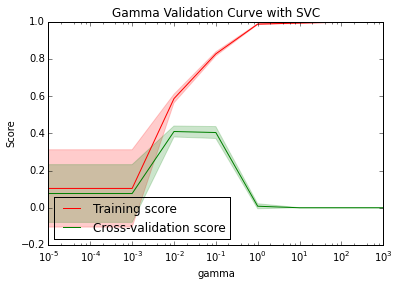

In [9]:
best_score, param_val, param_name = \
    plot_validation_curve(clf, X, Y, "gamma", np.logspace(-5, 3, 9),
                      "Gamma Validation Curve with SVC",
                      cv=cv, scoring=SCORING, n_jobs=JOBS)

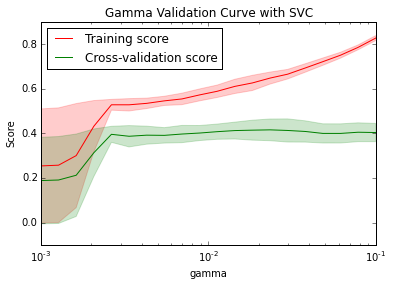

SVC(C=1.0, cache_size=200, class_weight='auto', coef0=0.0, degree=3,
  gamma=0.023357214690901212, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [10]:
param_log10 = math.log10(param_val)
best_score, param_val, param_name = \
    plot_validation_curve(clf, X, Y, param_name, np.logspace(param_log10 - 1, param_log10 + 1, 20),
                      "Gamma Validation Curve with SVC",
                      cv=cv, scoring=SCORING, n_jobs=JOBS)
clf.set_params(**dict([[param_name, param_val]]))

### Impact of C

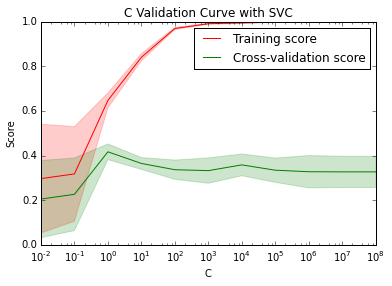

In [11]:
best_score, param_val, param_name = \
    plot_validation_curve(clf, X, Y, "C", np.logspace(-2, 8, 11),
                      "C Validation Curve with SVC",
                      cv=cv, scoring=SCORING, n_jobs=JOBS)

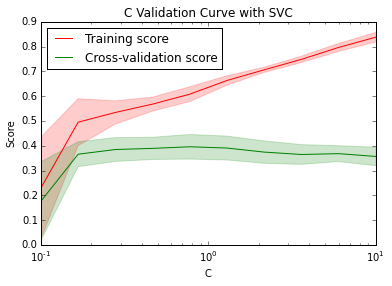

SVC(C=0.774263682681127, cache_size=200, class_weight='auto', coef0=0.0,
  degree=3, gamma=0.023357214690901212, kernel='rbf', max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [12]:
param_log10 = math.log10(param_val)
best_score, param_val, param_name = \
    plot_validation_curve(clf, X, Y, param_name, np.logspace(param_log10 - 1, param_log10 + 1, 10),
                      "C Validation Curve with SVC",
                      cv=cv, scoring=SCORING, n_jobs=JOBS)
clf.set_params(**dict([[param_name, param_val]]))

### Learning Curve

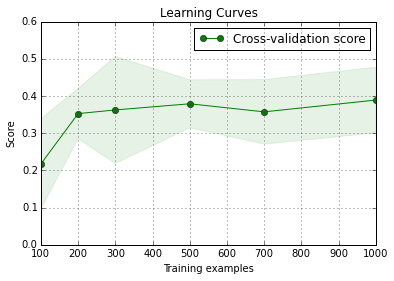

In [13]:
title = "Learning Curves"
my_plot_learning_curve(clf, title, X, Y,
                           n_jobs=JOBS, future=100,
                           history_sizes=[100, 200, 300, 500, 700, 1000])
plt.show()

### Prediction Curve

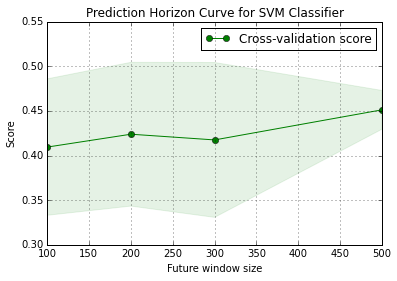

In [14]:
title = "Prediction Horizon Curve for SVM Classifier"
plot_prediction_curve(clf, title, X, Y,
                           n_jobs=JOBS, history=500,
                           future_sizes=[100, 200, 300, 500])
plt.show()

In [15]:
ET_results = eval_predictions(clf, X, Y, history_sizes=[300, 500, 1000], future_sizes=[100, 500])

** Predictions for hist=300 future=100 **

F1:        0.36  +/- 0.11
Accuracy:  0.61  +/- 0.07
Precision: 0.42  +/- 0.20
Recall:    0.43  +/- 0.19

Aggregate Confusion Matrix - 10 iterations
[[496 195]
 [192 117]]


** Predictions for hist=300 future=500 **

F1:        0.43  +/- 0.05
Accuracy:  0.61  +/- 0.05
Precision: 0.39  +/- 0.07
Recall:    0.52  +/- 0.14

Aggregate Confusion Matrix - 10 iterations
[[2320 1225]
 [ 720  735]]


** Predictions for hist=500 future=100 **

F1:        0.41  +/- 0.10
Accuracy:  0.63  +/- 0.06
Precision: 0.36  +/- 0.13
Recall:    0.57  +/- 0.12

Aggregate Confusion Matrix - 10 iterations
[[491 254]
 [118 137]]


** Predictions for hist=500 future=500 **

F1:        0.40  +/- 0.07
Accuracy:  0.62  +/- 0.03
Precision: 0.43  +/- 0.13
Recall:    0.49  +/- 0.21

Aggregate Confusion Matrix - 10 iterations
[[2446 1095]
 [ 801  658]]


** Predictions for hist=1000 future=100 **

F1:        0.38  +/- 0.07
Accuracy:  0.70  +/- 0.05
Precision: 0.33  +/- 0.08
Recall